# Week 8 - Advanced Machine Learning

During the course we have covered a variety of different tasks and algorithms. These were chosen for their broad applicability and ease of use with many important techniques and areas of study skipped. The goal of this class is to provide a brief overview of some of the latest advances and areas that could not be covered due to our limited time.

## Deep learning

![Basic neural network](https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/256px-Colored_neural_network.svg.png)
[Glosser.ca](https://commons.wikimedia.org/wiki/File%3AColored_neural_network.svg) via wikimedia. 

Although a [neural network](http://scikit-learn.org/dev/modules/neural_networks_supervised.html) has been added to scikit learn relatively recently it only runs on the CPU making the large neural networks now popular prohibitively slow. Fortunately, there are a number of different packages available for python that can run on a GPU. 

[Theano](https://github.com/Theano/Theano) is the GPGPU equivalent of numpy. It implements all the core functionality needed to build a deep neural network, and run it on the GPGPU, but does not come with an existing implementation.

A variety of packages have been built on top of Theano that enable neural networks to be implemented in a relatively straightforward manner. Parrallels can be draw with the relationship between numpy and scikit learn. [Pylearn2](http://deeplearning.net/software/pylearn2/) was perhaps the first major package built on Theano but has now been superseded by a number of new packages, including [blocks](https://blocks.readthedocs.org/en/latest), [keras](http://keras.io/), and [lasagne](https://lasagne.readthedocs.org/en/latest).

You may have also heard of [TensorFlow](http://tensorflow.org/) that was released by Google a year or two ago. TensorFlow lies somewhere between the low-level Theano and the high-level packages such as blocks, keras, and lasagne. Currently only keras supports TensorFlow as an alternative backend. Keras will also be included with TensorFlow soon.

Installing these packages with support for executing code on the GPU is more challenging than simply `conda install ...` or `pip install ...`. In addition to installing these packages it is also necessary to install the CUDA packages. 

Beyond the advances due to the greater computational capacity available on the GPU there have been a number of other important approaches utilized:

* [Convolutional neural nets](http://colah.github.io/posts/2014-07-Conv-Nets-Modular/)
* [Recurrent neural nets](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)
* Dropout
* Early stopping
* Data augmentation

![Convolutional neural network architecture](https://upload.wikimedia.org/wikipedia/commons/6/63/Typical_cnn.png)
[Aphex34](https://commons.wikimedia.org/w/index.php?title=User:Aphex34&action=edit&redlink=1) via wikimedia.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using Theano backend.
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


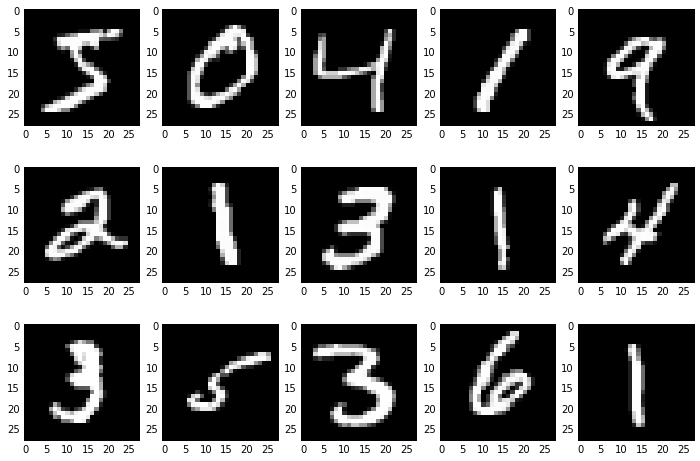

In [2]:
fig, axes = plt.subplots(3,5, figsize=(12,8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i], interpolation='nearest')
plt.show()

In [3]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

batch_size = 512
nb_classes = 10
nb_epoch = 3

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [4]:
# CAUTION: Without utilizing a GPU even this very short example is incredibly slow to run.

model = Sequential()

#model.add(Convolution2D(8, 1, 3, 3, input_shape=(1,28,28), activation='relu'))
model.add(Convolution2D(4, 3, 3, input_shape=(1,28,28), activation='relu'))
#model.add(Convolution2D(4, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(4, input_dim=4*28*28*0.25, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, input_dim=4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

model.fit(X_train[:1024], Y_train[:1024], batch_size=batch_size, nb_epoch=nb_epoch, verbose=1, 
          validation_data=(X_test, Y_test))

Train on 1024 samples, validate on 10000 samples
Epoch 1/3
1024/1024 [==============================] - 1097s - loss: 2.3856 - val_loss: 2.3192
Epoch 2/3
1024/1024 [==============================] - 915s - loss: 2.3827 - val_loss: 2.3109
Epoch 3/3
1024/1024 [==============================] - 893s - loss: 2.3587 - val_loss: 2.3034


C:\Users\stree\Anaconda3\lib\site-packages\keras\models.py:580: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '


In [5]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)

Test score: 2.30337825203


C:\Users\stree\Anaconda3\lib\site-packages\keras\models.py:621: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '


In [6]:
predictions = model.predict_classes(X_test)

10000/10000 [==============================] - 713s   


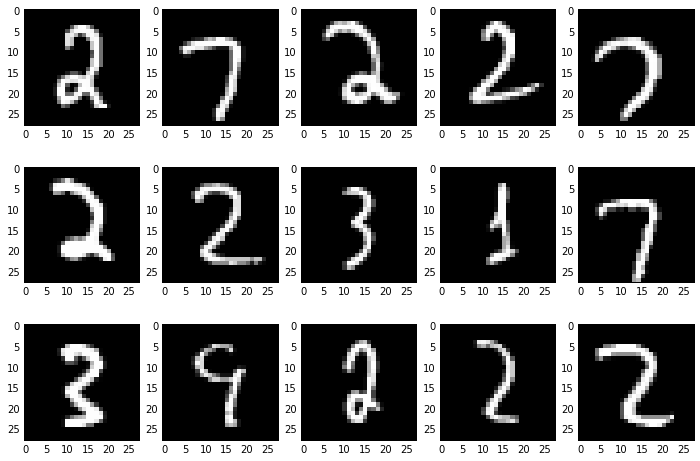

In [7]:
fig, axes = plt.subplots(3,5, figsize=(12,8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_test[predictions == 7][i].reshape((28,28)), interpolation='nearest')
plt.show()

The performance here is very poor. We really need to train with more samples and for more epochs.

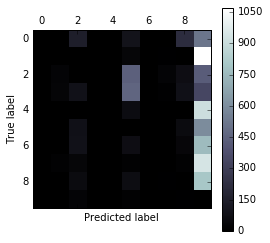

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

np.fill_diagonal(cm, 0)

plt.bone()
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Building a model on the NIH HPC

The [high performance computing group at NIH](https://hpc.nih.gov/) provides GPU equipped nodes on their GPU partition. This is an easy way to begin leveraging GPUs without the startup costs and maintainance requirements. 

Utilizing these nodes is relatively straightforward as long as you can connect to the Biowulf cluster.

### Building a model on the Amazon EC2 service

If you don't have access to the NIH HPC resources and don't want to buy a GPU there are a number of [cloud services](http://www.nvidia.com/object/gpu-cloud-computing-services.html) with GPU enabled machines available for rent. Probably the most well known service is Amazon Web services, and specifically their [EC2 service](https://aws.amazon.com/ec2).

Anyone (willing to pay) can use these services.

Using the [Bitfusion AMI](https://aws.amazon.com/marketplace/fulfillment?productId=dd1e96f9-9ede-4ff5-be40-3419bfca03a3&launch=manualLaunch) increases the cost but simplifies the startup process. Installation of the required drivers and software requires multiple steps, and this image has everything we need pre-configured.